# The Battle of Neighborhoods -- Safe and Delicious Bronx

## Data

For this project we need the following data:

1).	New York City Boroughs, Neighborhoods data

Data source: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq

Description: I will use this dataset to get the neighborhood information of NYC, in particular Bronx.

2).	New York City Crime data

Data source: https://data.cityofnewyork.us/Public-Safety/Crime-Map-/5jvd-shfj

Description: Crime data has location (lat and long) and categories

3).	New York City Restaurants

Data source: FourSquare API

Description: By using this API we will get all the venues in each neighborhood. 

In [35]:
#Import various python packages
import numpy as np 
import pandas as pd

#plotting
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

#geopandas
!pip install geopandas
import geopandas as gpd
!pip install descartes
from shapely import wkt
from shapely import speedups

#read file from IBM cloud
import types
from botocore.client import Config
import ibm_boto3

#foursquare
import requests # library to handle requests
import random # library for random number generation
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


     |████████████████████████████████| 79 kB 9.5 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=787361ad23459ce98c069111784b29446e1f6e5e7bda4b943a50aeff3dfe40e3
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


In [8]:
#read crime data and neighborhood boundary data (I uploaded to IBM cloud)
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
x = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = x.get_object(Bucket='capstoneproject-donotdelete-pr-yituoxtqvp6hjg',Key='Crime_Map_.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

nyc_crime = pd.read_csv(body)

body = xget_object(Bucket='capstoneproject-donotdelete-pr-yituoxtqvp6hjg',Key='nynta.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

nyn = pd.read_csv(body)

### Crime Data

In [9]:
#view crime data
nyc_crime.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,972326799,81,NaN,09/28/2020,21:27:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,09/28/2020,1003904,186483,40.678516,-73.929143,"(40.67851591200008, -73.92914304899993)"
1,376304873,52,NaN,09/27/2020,19:13:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,09/27/2020,1017928,258050,40.874906,-73.878224,"(40.87490600500007, -73.87822380899996)"
2,299326203,75,NaN,09/21/2020,01:21:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,09/21/2020,1021234,181211,40.663990,-73.866692,"(40.66399002800006, -73.86669235099998)"
3,674946147,121,NaN,09/15/2020,08:46:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,09/15/2020,938430,170972,40.635845,-74.165090,"(40.63584491100005, -74.165090337)"
4,416422620,101,NaN,09/08/2020,13:50:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,NaN,NaN,09/08/2020,1049837,157548,40.598875,-73.763823,"(40.59887464700005, -73.76382298499993)"


In [10]:
nyc_crime.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PARKS_NM', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon'],
      dtype='object')

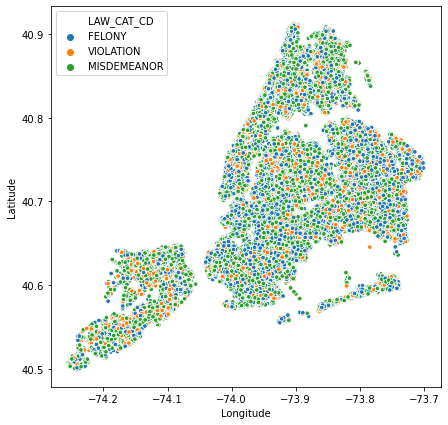

In [73]:
#Review the crimes by borough
plt.figure(figsize=(7,7))
sns.scatterplot(x='Longitude', y='Latitude', hue='LAW_CAT_CD',s=20, data=nyc_crime)

In [12]:
#get year out of date
nyc_crime['date'] = pd.to_datetime(nyc_crime['CMPLNT_FR_DT'],errors = 'coerce')
nyc_crime = nyc_crime.dropna(subset=['date'])
nyc_crime['year'] = pd.DatetimeIndex(nyc_crime['date']).year
nyc_crime.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,date,year
0,972326799,81,NaN,09/28/2020,21:27:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,09/28/2020,1003904,186483,40.678516,-73.929143,"(40.67851591200008, -73.92914304899993)",2020-09-28,2020
1,376304873,52,NaN,09/27/2020,19:13:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,09/27/2020,1017928,258050,40.874906,-73.878224,"(40.87490600500007, -73.87822380899996)",2020-09-27,2020
2,299326203,75,NaN,09/21/2020,01:21:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,09/21/2020,1021234,181211,40.663990,-73.866692,"(40.66399002800006, -73.86669235099998)",2020-09-21,2020
3,674946147,121,NaN,09/15/2020,08:46:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,09/15/2020,938430,170972,40.635845,-74.165090,"(40.63584491100005, -74.165090337)",2020-09-15,2020
4,416422620,101,NaN,09/08/2020,13:50:00,NaN,NaN,COMPLETED,NaN,N.Y. POLICE DEPT,...,NaN,NaN,09/08/2020,1049837,157548,40.598875,-73.763823,"(40.59887464700005, -73.76382298499993)",2020-09-08,2020


In [13]:
#ok, we only care 2019-2020 crime data
#we only need some columns
nyc_crime = nyc_crime[['year','BORO_NM','LAW_CAT_CD','Latitude','Longitude']]
nyc_crime = nyc_crime[nyc_crime.year > 2018]
nyc_crime.shape

(305152, 5)

In [14]:
#ok tease out Bronx data
bronx_crime = nyc_crime[nyc_crime.BORO_NM == 'BRONX']
print ('Bronx NY has ' + str(bronx_crime.shape[0]) + ' crime complaints received by NYPD since 2019.')

Bronx NY has 66715 crime complaints received by NYPD since 2019.


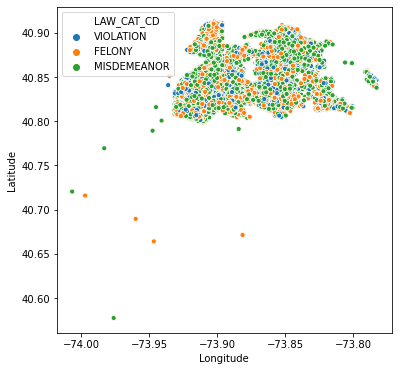

In [16]:
#Review the crimes in Bronx
plt.figure(figsize=(6,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='LAW_CAT_CD', s=25, data=bronx_crime)

#### we see that there are some outliers, but right now don't worry

#### we will be using the neighborhood boundary to filter those -- below

### Neighborhood Data

In [17]:
#neighborhood boundary data
nyn.head()

,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,NTAName,Shape_Leng,Shape_Area
0,3,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,Brooklyn,BK88,Borough Park,39247.227831,5.400502e+07
1,4,MULTIPOLYGON (((-73.80379022888246 40.77561011...,81,Queens,QN51,Murray Hill,33266.904872,5.248828e+07
2,4,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,Queens,QN27,East Elmhurst,19816.712132,1.972685e+07
3,3,MULTIPOLYGON (((-73.94826499590911 40.63860718...,47,Brooklyn,BK95,Erasmus,18756.701865,1.452260e+07
4,4,MULTIPOLYGON (((-73.75725671509139 40.71813860...,81,Queens,QN07,Hollis,20976.335600,2.288777e+07


In [18]:
#There is a lot going on here... first rename the column
nyn.rename(columns={'NTAName':'neighborhood'}, inplace=True)

#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly

nyn['geom'] = nyn['the_geom'].apply(wkt.loads)

#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nyn = gpd.GeoDataFrame(nyn, geometry='geom')

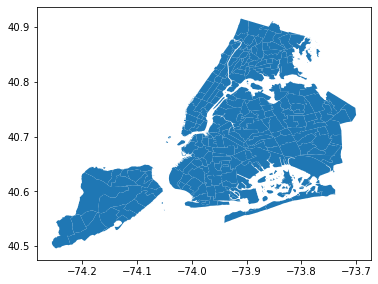

In [74]:
#Lets take a look at what the neighborhoods look like
fig,ax = plt.subplots(1,1, figsize=(6,6))
nyn.plot(ax=ax)

In [21]:
#again--focus on Bronx
bronx_hood = nyn[nyn.BoroName == 'Bronx']
bronx_hood.head()

,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,neighborhood,Shape_Leng,Shape_Area,geom
7,2,MULTIPOLYGON (((-73.89483522923975 40.82624684...,5,Bronx,BX33,Longwood,18982.130068,1.073245e+07,"MULTIPOLYGON (((-73.89484 40.82625, -73.89487 ..."
25,2,MULTIPOLYGON (((-73.84792614069238 40.87134223...,5,Bronx,BX31,Allerton-Pelham Gardens,25467.117425,3.169304e+07,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
33,2,MULTIPOLYGON (((-73.86272273399078 40.83292068...,5,Bronx,BX08,West Farms-Bronx River,17477.294761,1.508499e+07,"MULTIPOLYGON (((-73.86272 40.83292, -73.86367 ..."
34,2,MULTIPOLYGON (((-73.86033845912314 40.83325316...,5,Bronx,BX46,Parkchester,12411.788209,9.184677e+06,"MULTIPOLYGON (((-73.86034 40.83325, -73.86038 ..."
35,2,MULTIPOLYGON (((-73.86033845912314 40.83325316...,5,Bronx,BX55,Soundview-Bruckner,19756.559787,1.625336e+07,"MULTIPOLYGON (((-73.86034 40.83325, -73.86033 ..."


In [22]:
print ('Bronx has ' + str(len(bronx_hood.neighborhood.unique())) + ' neighborhoods.')

Bronx has 38 neighborhoods.


#### Bronx neighborhood map

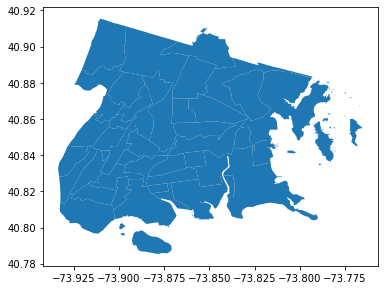

In [23]:
fig,ax = plt.subplots(1,1, figsize=(6,6))
bronx_hood.plot(ax=ax)

In [24]:
bronx_crime_g = gpd.GeoDataFrame(bronx_crime, geometry=gpd.points_from_xy(bronx_crime.Longitude, bronx_crime.Latitude))

In [25]:
bronx_crime_g.head()

,year,BORO_NM,LAW_CAT_CD,Latitude,Longitude,geometry
12,2020,BRONX,VIOLATION,40.832826,-73.867539,POINT (-73.86754 40.83283)
18,2020,BRONX,FELONY,40.867046,-73.896316,POINT (-73.89632 40.86705)
32,2020,BRONX,FELONY,40.825394,-73.926183,POINT (-73.92618 40.82539)
47,2020,BRONX,FELONY,40.816088,-73.895824,POINT (-73.89582 40.81609)
56,2020,BRONX,FELONY,40.883622,-73.857721,POINT (-73.85772 40.88362)


### Crimes and Neighborhood

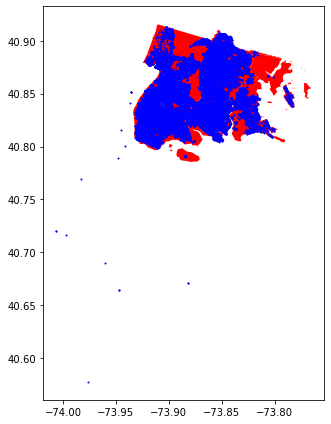

In [26]:
# Create a figure with one subplot
fig, ax = plt.subplots(1,1,figsize=(6,6))

# Plot polygons
bronx_hood.plot(ax=ax, facecolor='red')

# Plot points
bronx_crime_g.plot(ax=ax, color='blue', markersize=1)

plt.tight_layout()

In [27]:
speedups.enabled

True

In [28]:
bronx_hood.reset_index(inplace = True)

In [29]:
#geopandas spatial join is not successful, another way
crimedf_list = []
for i in range(len(bronx_hood)):
    #hood = bronx_hood.iloc[[i]]
    mask = bronx_crime_g.within(bronx_hood.iloc[i, 9])
    #mask = bronx_crime_g.within(hood.at[i, 'geom'])
    crimedf = bronx_crime_g.loc[mask]
    print (bronx_hood.iloc[i, 6]) #you can print it out
    crimedf['neighborhood'] = bronx_hood.iloc[i, 6]
    crimedf_list.append(crimedf)

Longwood
Allerton-Pelham Gardens


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


West Farms-Bronx River
Parkchester
Soundview-Bruckner
Van Cortlandt Village
Woodlawn-Wakefield
Bronxdale
Rikers Island
Schuylerville-Throgs Neck-Edgewater Park
Highbridge
North Riverdale-Fieldston-Riverdale
Spuyten Duyvil-Kingsbridge
Soundview-Castle Hill-Clason Point-Harding Park
Morrisania-Melrose
Norwood
Bedford Park-Fordham North
Fordham South
Mount Hope
Eastchester-Edenwald-Baychester
Co-op City
East Tremont
Pelham Parkway
Williamsbridge-Olinville
Kingsbridge Heights
University Heights-Morris Heights
Crotona Park East
Melrose South-Mott Haven North
East Concourse-Concourse Village
Claremont-Bathgate
Belmont
Van Nest-Morris Park-Westchester Square
Westchester-Unionport
Pelham Bay-Country Club-City Island
park-cemetery-etc-Bronx
Hunts Point
Mott Haven-Port Morris
West Concourse


In [30]:
bronx_data = pd.concat(crimedf_list)
print ('Joined data has ' + str(len(bronx_data))+' rows')
bronx_data.head()

Joined data has 66294 rows


,year,BORO_NM,LAW_CAT_CD,Latitude,Longitude,geometry,neighborhood
89,2020,BRONX,MISDEMEANOR,40.820411,-73.893328,POINT (-73.89333 40.82041),Longwood
170,2020,BRONX,FELONY,40.823779,-73.899920,POINT (-73.89992 40.82378),Longwood
800,2020,BRONX,MISDEMEANOR,40.826130,-73.895332,POINT (-73.89533 40.82613),Longwood
874,2020,BRONX,FELONY,40.822802,-73.900327,POINT (-73.90033 40.82280),Longwood
1364,2020,BRONX,MISDEMEANOR,40.820823,-73.899397,POINT (-73.89940 40.82082),Longwood


#### now overlay filtered crime data

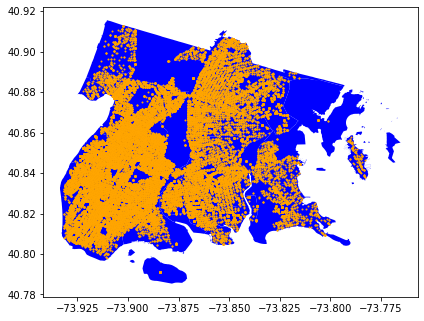

In [180]:
# Create a figure with one subplot
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Plot polygons
bronx_hood.plot(ax=ax, facecolor='blue')

# Plot points
bronx_data.plot(ax=ax, color='orange', markersize=1)

plt.tight_layout()

#### let's do some simple tabulation by neighborhood

In [32]:
nb_join_count = bronx_data.groupby('neighborhood')['LAW_CAT_CD'].count().reset_index()
nb_join_count.rename(columns = {'LAW_CAT_CD' : 'crime_count'}, inplace = True)
true_count = bronx_hood.merge(nb_join_count, on='neighborhood')
true_count.head()

,index,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,neighborhood,Shape_Leng,Shape_Area,geom,crime_count
0,7,2,MULTIPOLYGON (((-73.89483522923975 40.82624684...,5,Bronx,BX33,Longwood,18982.130068,1.073245e+07,"MULTIPOLYGON (((-73.89484 40.82625, -73.89487 ...",1446
1,25,2,MULTIPOLYGON (((-73.84792614069238 40.87134223...,5,Bronx,BX31,Allerton-Pelham Gardens,25467.117425,3.169304e+07,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...",746
2,33,2,MULTIPOLYGON (((-73.86272273399078 40.83292068...,5,Bronx,BX08,West Farms-Bronx River,17477.294761,1.508499e+07,"MULTIPOLYGON (((-73.86272 40.83292, -73.86367 ...",1587
3,34,2,MULTIPOLYGON (((-73.86033845912314 40.83325316...,5,Bronx,BX46,Parkchester,12411.788209,9.184677e+06,"MULTIPOLYGON (((-73.86034 40.83325, -73.86038 ...",768
4,35,2,MULTIPOLYGON (((-73.86033845912314 40.83325316...,5,Bronx,BX55,Soundview-Bruckner,19756.559787,1.625336e+07,"MULTIPOLYGON (((-73.86034 40.83325, -73.86033 ...",1380


Text(0.5, 1.0, 'Number of Crimes by Neighborhoods in Bronx')

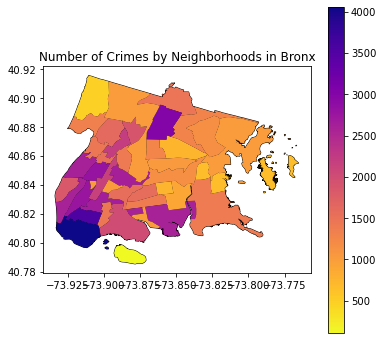

In [179]:
#Lets plot the data
fig,ax = plt.subplots(1,1, figsize=(6,6))

base = bronx_hood.plot(color='white', edgecolor='black', ax=ax)

true_count.plot(column='crime_count',cmap='plasma_r', ax=base, legend=True)
plt.title('Number of Crimes by Neighborhoods in Bronx')

### FourSquare Place Data

In [54]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20201130'
LIMIT = 1000000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [56]:
CITY = 'Bronx, NY'
url = 'https://api.foursquare.com/v2/venues/explore?near={}&client_id={}&client_secret={}&v={}&limit={}'.format(CITY, CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT)

results = requests.get(url).json()

'We only found {} places in Bronx, NY.'.format(len(results['response']['groups'][0]['items']))

'We only found 100 places in Bronx, NY.'

In [42]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '49df79b7f964a520ca601fe3',
  'name': 'The New York Botanical Garden',
  'location': {'address': '2900 Southern Blvd',
   'crossStreet': 'at Bronx Park Rd',
   'lat': 40.86262485277416,
   'lng': -73.87724161148071,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.86262485277416,
     'lng': -73.87724161148071}],
   'postalCode': '10458',
   'cc': 'US',
   'neighborhood': 'Bronx Park',
   'city': 'Bronx',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['2900 Southern Blvd (at Bronx Park Rd)',
    'Bronx, NY 10458',
    'United States']},
  'categories': [{'id': '52e81612bcbc57f1066b7a22',
    'name': 'Botanical Garden',
    'pluralName': 'Botanical Gardens',
    'shortName': 'Botanical Garden',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/botanicalgarden_',
    

In [45]:
dataframe = json_normalize(items) # flatten JSON

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,The New York Botanical Garden,Botanical Garden,2900 Southern Blvd,at Bronx Park Rd,40.862625,-73.877242,"[{'label': 'display', 'lat': 40.86262485277416...",10458,US,Bronx Park,Bronx,NY,United States,"[2900 Southern Blvd (at Bronx Park Rd), Bronx,...",49df79b7f964a520ca601fe3
1,Kingsbridge Social Club,Pizza Place,3625 Kingsbridge Ave,NaN,40.884581,-73.901999,"[{'label': 'entrance', 'lat': 40.884542, 'lng'...",10463,US,NaN,Bronx,NY,United States,"[3625 Kingsbridge Ave, Bronx, NY 10463, United...",58935fd798f8aa7c14662653
2,Wave Hill,Garden,675 W 252nd St,Independence Ave,40.900062,-73.912446,"[{'label': 'display', 'lat': 40.90006218949472...",10471,US,NaN,Bronx,NY,United States,"[675 W 252nd St (Independence Ave), Bronx, NY ...",49e33171f964a5206a621fe3
3,iLoveKickboxing,Gym,2007 Colonial Avenue,NaN,40.852871,-73.828085,"[{'label': 'display', 'lat': 40.8528708, 'lng'...",10461,US,NaN,Bronx,NY,United States,"[2007 Colonial Avenue, Bronx, NY 10461, United...",58ec6b4001f0777e49e4d2a5
4,Tino's Delicatessen,Italian Restaurant,2410 Arthur Ave,E. 187 St.,40.855882,-73.887166,"[{'label': 'display', 'lat': 40.85588217093613...",10458,US,NaN,Bronx,NY,United States,"[2410 Arthur Ave (E. 187 St.), Bronx, NY 10458...",4acf80aef964a52025d420e3


In [47]:
#get what we need
bronx_plc = dataframe_filtered[['name','categories','lat','lng','neighborhood']]
bronx_plc.head()

,name,categories,lat,lng,neighborhood
0,The New York Botanical Garden,Botanical Garden,40.862625,-73.877242,Bronx Park
1,Kingsbridge Social Club,Pizza Place,40.884581,-73.901999,NaN
2,Wave Hill,Garden,40.900062,-73.912446,NaN
3,iLoveKickboxing,Gym,40.852871,-73.828085,NaN
4,Tino's Delicatessen,Italian Restaurant,40.855882,-73.887166,NaN


#### let's map it

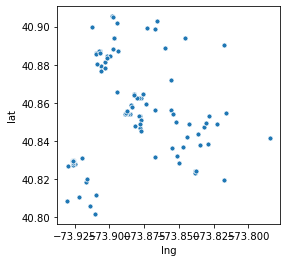

In [178]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='lng', y='lat', s=25, data=bronx_plc)

In [48]:
bronx_plc.neighborhood.unique()

array(['Bronx Park', nan, 'Van Cortlandt Park', 'Mott Haven', 'Wakefield'],
      dtype=object)

#### we have a lot of missing neighborhood information, we need to do spatial join again

### Place and Neighborhood

In [50]:
bronx_plc_g = gpd.GeoDataFrame(bronx_plc, geometry=gpd.points_from_xy(bronx_plc.lng, bronx_plc.lat))
bronx_plc_g.head()

,name,categories,lat,lng,neighborhood,geometry
0,The New York Botanical Garden,Botanical Garden,40.862625,-73.877242,Bronx Park,POINT (-73.87724 40.86262)
1,Kingsbridge Social Club,Pizza Place,40.884581,-73.901999,NaN,POINT (-73.90200 40.88458)
2,Wave Hill,Garden,40.900062,-73.912446,NaN,POINT (-73.91245 40.90006)
3,iLoveKickboxing,Gym,40.852871,-73.828085,NaN,POINT (-73.82808 40.85287)
4,Tino's Delicatessen,Italian Restaurant,40.855882,-73.887166,NaN,POINT (-73.88717 40.85588)


In [53]:
#geopandas spatial join is not successful, another way
placedf_list = []
for i in range(len(bronx_hood)):
    #hood = bronx_hood.iloc[[i]]
    mask = bronx_plc_g.within(bronx_hood.iloc[i, 9])
    placedf = bronx_plc_g.loc[mask]
    placedf['neighborhood'] = bronx_hood.iloc[i, 6]
    placedf_list.append(placedf)

bronx_place = pd.concat(placedf_list)
print ('Joined data has ' + str(len(bronx_place))+' rows')
bronx_place.head()

Joined data has 98 rows


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,name,categories,lat,lng,neighborhood,geometry
50,Gun Hill Brewing Co.,Brewery,40.872139,-73.855698,Allerton-Pelham Gardens,POINT (-73.85570 40.87214)
8,Taqueria Tlaxcali,Mexican Restaurant,40.836098,-73.854948,Parkchester,POINT (-73.85495 40.83610)
85,John's Diner,American Restaurant,40.831713,-73.866897,Soundview-Bruckner,POINT (-73.86690 40.83171)
90,The Bronx Public,Pub,40.878377,-73.903481,Van Cortlandt Village,POINT (-73.90348 40.87838)
80,Lollipops Gelato,Dessert Shop,40.894123,-73.845892,Woodlawn-Wakefield,POINT (-73.84589 40.89412)


In [176]:
place_count = bronx_place.groupby('neighborhood')['categories'].count().reset_index()
place_count.head()

,neighborhood,categories
0,Allerton-Pelham Gardens,1
1,Bedford Park-Fordham North,1
2,Belmont,14
3,East Concourse-Concourse Village,1
4,Melrose South-Mott Haven North,2


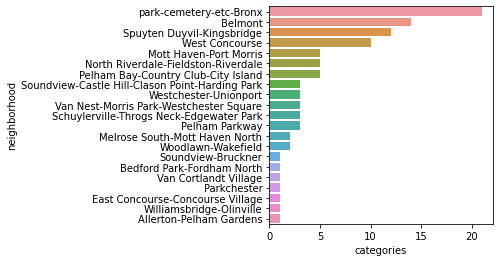

In [177]:
## simple tabulation
plt.figure(figsize=(4,4))
sns.barplot(x="categories", y="neighborhood", data=place_count.sort_values(by = 'categories', ascending = False), orient = 'h')

#### we see that most of the places we got from Foursquare are parks/cemetery related, and we have a lot of places in Belmont too

Text(0.5, 1.0, 'Number of Places by Neighborhoods in Bronx')

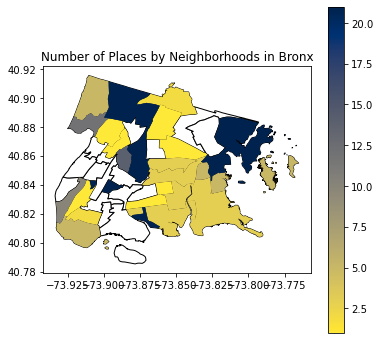

In [171]:
#map it 
place_count.rename(columns = {'categories' : 'place_count'}, inplace = True)
plc_true_count = bronx_hood.merge(place_count, on='neighborhood')
plc_true_count.head()

fig,ax = plt.subplots(1,1, figsize=(6,6))

base = bronx_hood.plot(color='white', edgecolor='black', ax=ax)

plc_true_count.plot(column='place_count',cmap='cividis_r', ax=base, legend=True)
plt.title('Number of Places by Neighborhoods in Bronx')

#### we see that there are a lot of neighborhoods missing -- we will go with this

### Clustering Analysis

#### 1. One hot coding transforming foursquare data
#### 2. K-Means clustering
#### 3. compare with crime data

In [119]:
#one-hot coding
bronx_place_short = bronx_place[['neighborhood','categories']]
bronx_place_onehot = pd.get_dummies(bronx_place_short[['categories']], prefix="", prefix_sep="")
bronx_place_onehot['neighborhood'] = bronx_place_short['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_place_onehot.columns[-1]] + list(bronx_place_onehot.columns[:-1])
bronx_place_onehot = bronx_place_onehot[fixed_columns]

bronx_place_grouped = bronx_place_onehot.groupby('neighborhood').mean().reset_index()

bronx_place_grouped.head()

,neighborhood,American Restaurant,Art Museum,Athletics & Sports,Bagel Shop,Bakery,Baseball Field,Baseball Stadium,Beer Bar,Beer Garden,...,Sandwich Place,Soccer Field,Sports Bar,Stables,Tapas Restaurant,Track,Trail,Yoga Studio,Zoo,Zoo Exhibit
0,Allerton-Pelham Gardens,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bedford Park-Fordham North,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Belmont,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,East Concourse-Concourse Village,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Melrose South-Mott Haven North,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
#clustering
from sklearn.cluster import KMeans
kclusters = 5

bronx_clustering = bronx_place_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 1, 3, 2, 2, 1, 2, 1, 1], dtype=int32)

In [166]:
#create a new dataframe and map it
bronx_all = bronx_place_grouped.copy()
bronx_all['Cluster Labels'] = kmeans.labels_

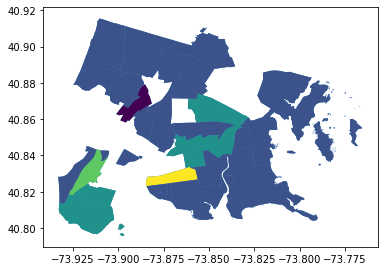

In [167]:
bronx_all_n = bronx_all[['neighborhood','Cluster Labels']]
bronx_merge = bronx_hood.merge(bronx_all_n, on = 'neighborhood', how = 'right')

#Lets plot the data
fig,ax = plt.subplots(1,1, figsize=(6,6))
base = bronx_merge.plot(ax=ax)
bronx_merge.plot(column='Cluster Labels', ax=base)

#### apparently most of the neighborhoods are very similar based on K-Means clustering analysis

#### now, let's compare with crime data map

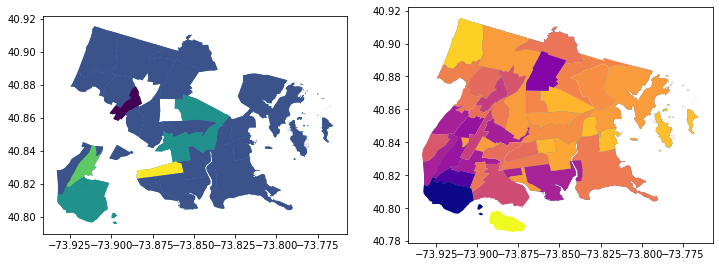

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(12,12))

base1 = bronx_merge.plot(ax = axs[0])
bronx_merge.plot(column='Cluster Labels', ax=base1)

base2 = bronx_merge.plot(ax=axs[1])
true_count.plot(column='crime_count',cmap='plasma_r', ax=base2)

#### Looking at these two maps, we can't really choose a neighborhood, which means clustering analysis is not the correct tool for our purposes

#### let's look at the crime and place map again

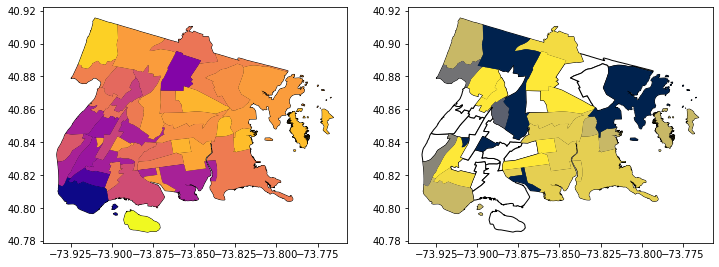

In [182]:
fig, axs = plt.subplots(1, 2, figsize=(12,12))

base1 = bronx_hood.plot(color='white', edgecolor='black',ax=axs[0])
true_count.plot(column='crime_count',cmap='plasma_r', ax=base1)

base2 = bronx_hood.plot(color='white', edgecolor='black', ax=axs[1])
plc_true_count.plot(column='place_count',cmap='cividis_r', ax=base2)

In [187]:
place_count.sort_values(by = 'categories', ascending = False).head(5)

,neighborhood,categories
20,park-cemetery-etc-Bronx,21
2,Belmont,14
13,Spuyten Duyvil-Kingsbridge,12
16,West Concourse,10
5,Mott Haven-Port Morris,5


#### we are not going to live in a park of cemetery, so let look at the remaining top3 neighborhoods

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


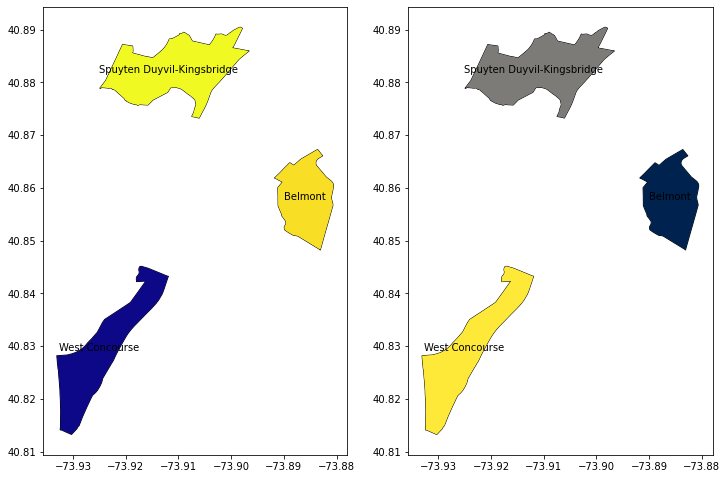

In [227]:
hood_list = ['Belmont', 'Spuyten Duyvil-Kingsbridge', 'West Concourse' ]
bronx_hood_3 = bronx_hood[bronx_hood.neighborhood.isin(hood_list)]
true_count_3 = true_count[true_count.neighborhood.isin(hood_list)]
plc_true_count_3 = plc_true_count[plc_true_count.neighborhood.isin(hood_list)]

true_count_3['coords'] = true_count_3['geom'].apply(lambda x: x.representative_point().coords[:])
true_count_3['coords'] = [coords[0] for coords in true_count_3['coords']]

plc_true_count_3['coords'] = plc_true_count_3['geom'].apply(lambda x: x.representative_point().coords[:])
plc_true_count_3['coords'] = [coords[0] for coords in plc_true_count_3['coords']]

fig, axs = plt.subplots(1, 2, figsize=(12,12))

base1 = bronx_hood_3.plot(color='white', edgecolor='black',ax=axs[0])
true_count_3.plot(column='crime_count',cmap='plasma_r', ax=base1)
for idx, row in true_count_3.iterrows():
    axs[0].annotate(s=row['neighborhood'], xy=row['coords'],
                 horizontalalignment='center')

base2 = bronx_hood_3.plot(color='white', edgecolor='black', ax=axs[1])
plc_true_count_3.plot(column='place_count',cmap='cividis_r', ax=base2)
for idx, row in plc_true_count_3.iterrows():
    axs[1].annotate(s=row['neighborhood'], xy=row['coords'],
                 horizontalalignment='center')

In [228]:
true_count_3 = true_count_3[['neighborhood', 'crime_count']]
plc_true_count_3 = plc_true_count_3[['neighborhood', 'place_count']]
bronx_m = true_count_3.merge(plc_true_count_3, on = 'neighborhood')
bronx_m

,neighborhood,crime_count,place_count
0,Spuyten Duyvil-Kingsbridge,1333,12
1,Belmont,1410,14
2,West Concourse,2597,10


In [234]:
#let's do a simple weighted average calculation
bronx_m['crime_standarized'] = (bronx_m['crime_count'] - min(bronx_m['crime_count']))/ (max(bronx_m['crime_count']) - min(bronx_m['crime_count']))
bronx_m['place_standarized'] = (bronx_m['place_count'] - min(bronx_m['place_count']))/ (max(bronx_m['place_count']) - min(bronx_m['place_count']))
bronx_m['score'] = bronx_m['place_standarized'] *0.5 + bronx_m['crime_standarized'] * -1 * 0.5 
bronx_m.sort_values(by = 'score', ascending = False, inplace = True)
bronx_m[['neighborhood', 'score']]

,neighborhood,score
1,Belmont,0.469541
0,Spuyten Duyvil-Kingsbridge,0.250000
2,West Concourse,-0.500000


### Yeah, we are going to Belmont!! Wait, but where is it?

In [251]:
latitude = 40.856673 
longitude = -73.877499

Belmont= bronx_hood_3[bronx_hood_3.neighborhood == 'Belmont']
Belmont.crs = "EPSG:4326"

Belmont_map = folium.Map(location=[latitude, longitude], zoom_start=15)
folium.GeoJson(data=bronx_final["geom"]).add_to(Belmont_map)
# display map
Belmont_map

### We have zoo, we have park, we have university!!! Best place for families!!